# Genrify Project
## Music genre prediction

Henri Toussaint<br>
Victor Saint Guilhem<br>
Benoît Lafon<br>

The project sets out to predict the genre of a music using the Spotify API.

## Data Loading

In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

with open('music_collection.csv', newline='') as csvfile:
    spamreader = csv.reader(csvfile)
    data = []
    for row in spamreader:
        data.append(row)

ndata = np.array(data)
data_attributes = ndata[1::, 2:14]
data_target = ndata[1::, 14]
print("Number of instances: " + str(np.shape(data_attributes)[0]))
print("Number of features: " + str(np.shape(data_attributes)[1]))
print(ndata[0, 2:14])


Number of instances: 200
Number of features: 12
['acousticness' 'danceability' 'duration_ms' 'energy' 'instrumentalness'
 'key' 'liveness' 'loudness' 'speechiness' 'tempo' 'time_signature'
 'valence']


# Data Loading Using Pandas

In [2]:
import pandas as pd

data = pd.read_csv("music_collection.csv")
data_attributes = data.loc[:,'acousticness':'valence']

print('Number of instances: ' + str(data.shape[0]))
print('Number of attributes: ' + str(data_attributes.shape[1]))
print('Attributes:')
for i in data_attributes.columns.values:
    print('\t'+str(i))

Number of instances: 200
Number of attributes: 12
Attributes:
	acousticness
	danceability
	duration_ms
	energy
	instrumentalness
	key
	liveness
	loudness
	speechiness
	tempo
	time_signature
	valence


In [3]:
data.head()

,artist,track,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,time_signature,valence,genre
0,Keith Jarrett,Everything I Love,0.876,0.385,273973,0.3100,0.942000,0,0.1270,-17.769,0.0351,105.816,4.0,0.380,jazz
1,Ella Fitzgerald,It's Only A Paper Moon,0.958,0.732,156933,0.1380,0.000000,10,0.1070,-14.280,0.0431,118.440,4.0,0.627,jazz
2,Charles Mingus,Self-Portrait In Three Colours,0.980,0.224,186707,0.0937,0.784000,10,0.1070,-15.641,0.0343,168.418,3.0,0.098,jazz
3,Eric Reed,I Still Believe in You,0.964,0.605,285000,0.0223,0.907000,1,0.0851,-22.559,0.0499,67.851,4.0,0.218,jazz
4,Ornette Coleman,Lonely Woman,0.412,0.467,299507,0.3160,0.000351,9,0.0940,-12.072,0.0297,81.013,4.0,0.260,jazz


# Target variable

<IPython.core.display.Javascript object>


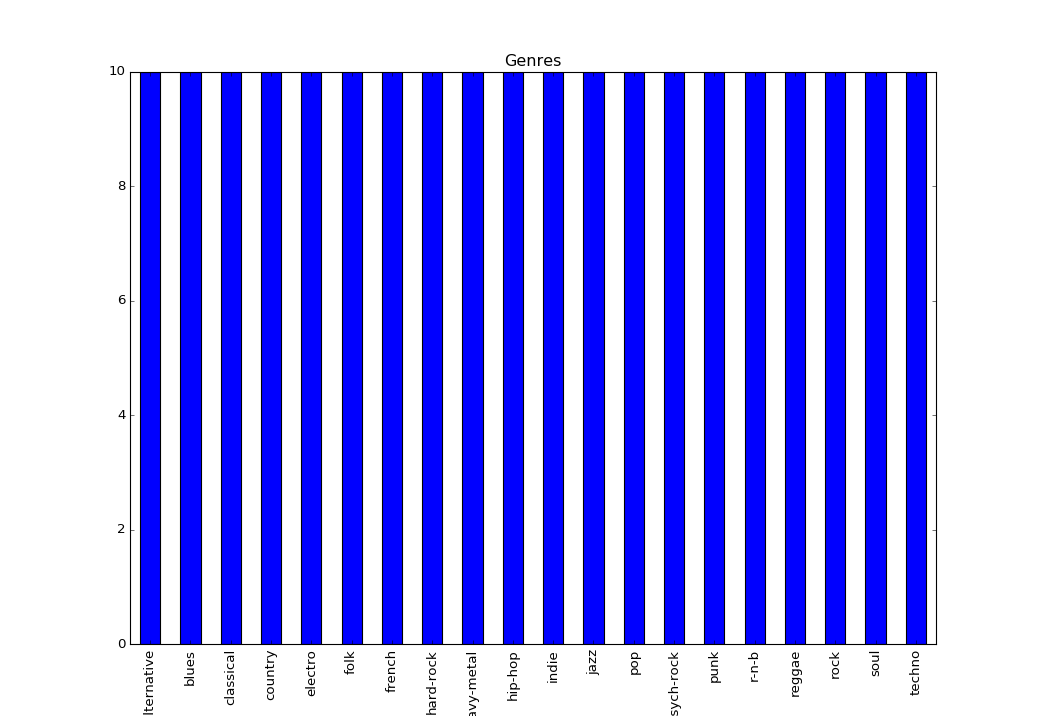

In [4]:
#plt.figure('Genres')
data['genre'] = data['genre'].astype("category")
data_target = data.loc[:,'genre']
count_genre = data.groupby("genre").size()
count_genre.plot(kind='bar',title='Genres', figsize=[13,8])

# Acousticness attribute

<IPython.core.display.Javascript object>


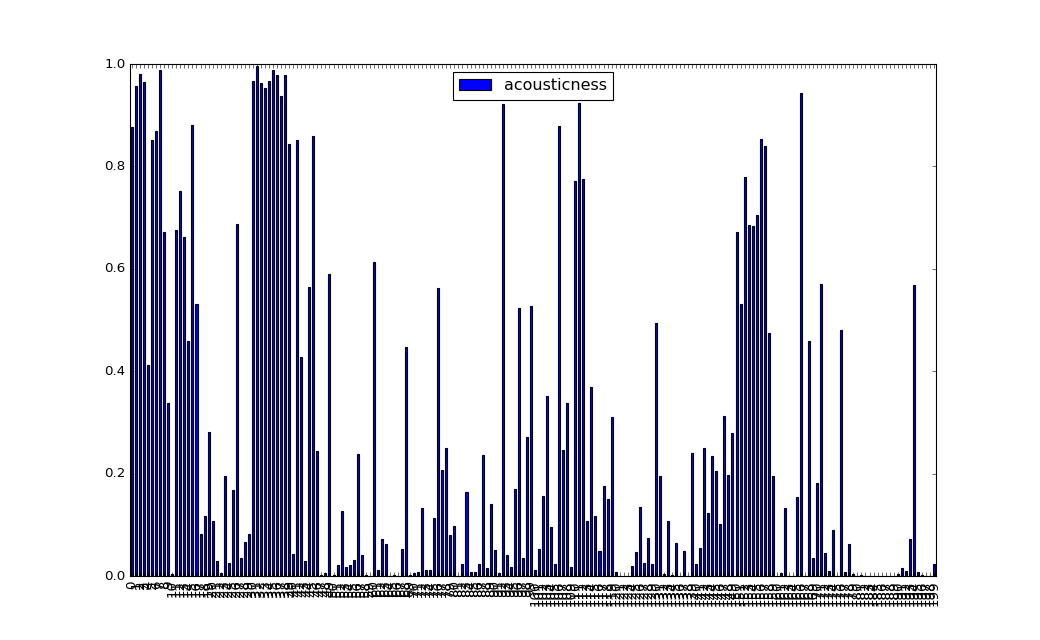

In [5]:
acousticness = data[['acousticness']]
acousticness.plot(kind='bar',figsize=[13,8])

In [6]:
acousticness.describe()

,acousticness
count,200.000000
mean,0.264370
std,0.327115
min,0.000007
25%,0.010850
50%,0.099800
75%,0.476500
max,0.996000


# Danceability attribute

<IPython.core.display.Javascript object>


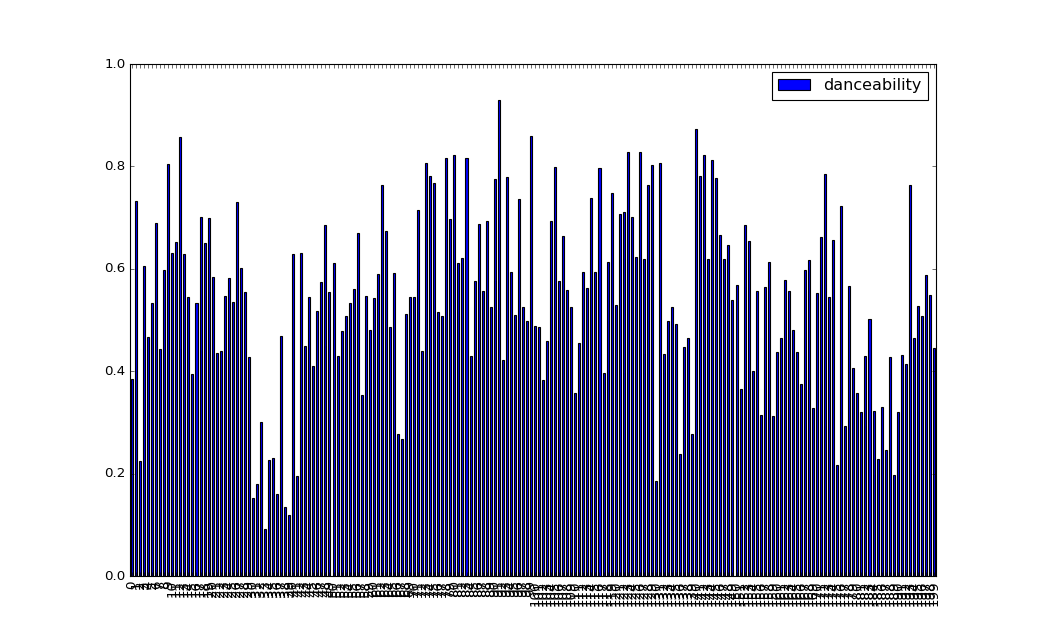

In [7]:
danceability = data[['danceability']]
danceability.plot(kind='bar',figsize=[13,8])

In [8]:
danceability.describe()

,danceability
count,200.000000
mean,0.541350
std,0.174454
min,0.092000
25%,0.436750
50%,0.546500
75%,0.663500
max,0.930000


# Duration attribute

<IPython.core.display.Javascript object>


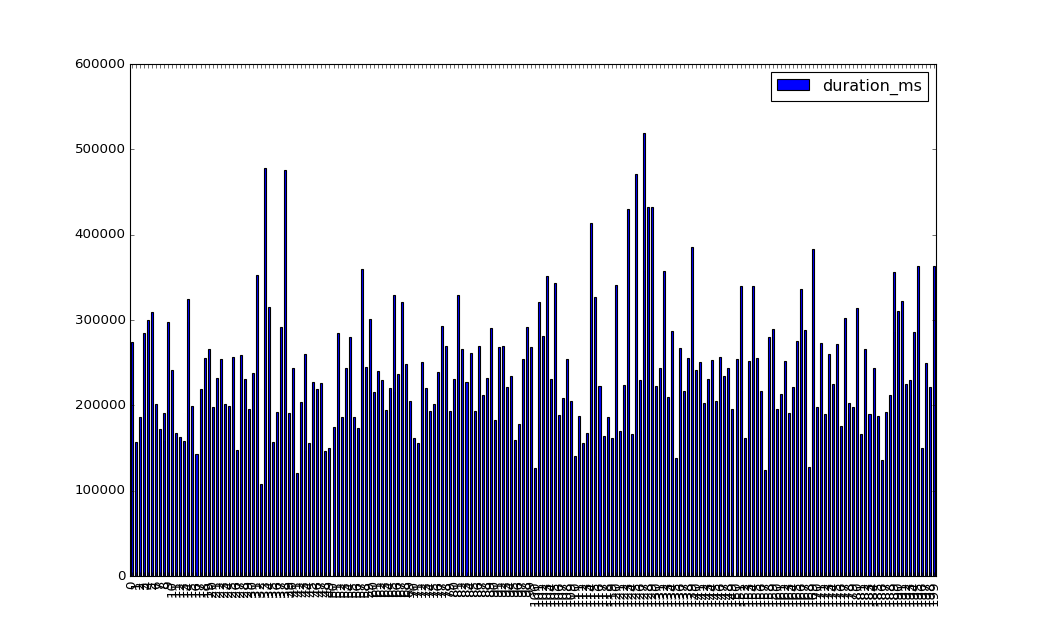

In [9]:
duration_ms = data[['duration_ms']]
duration_ms.plot(kind='bar',figsize=[13,8])

In [10]:
duration_ms.describe()

,duration_ms
count,200.000000
mean,242882.105000
std,72957.991941
min,107893.000000
25%,192847.000000
50%,231033.000000
75%,276560.000000
max,519360.000000


# Energy attribute

<IPython.core.display.Javascript object>


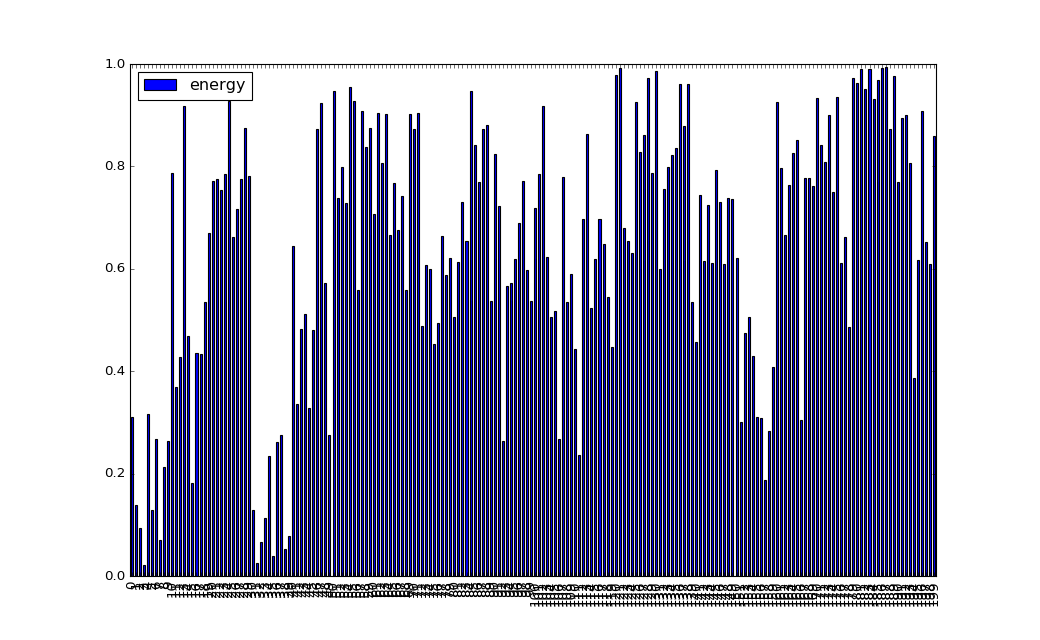

In [11]:
energy = data[['energy']]
energy.plot(kind='bar',figsize=[13,8])

In [12]:
energy.describe()

,energy
count,200.000000
mean,0.643409
std,0.251341
min,0.022300
25%,0.492750
50%,0.684500
75%,0.842000
max,0.995000


# Instrumentalness attribute

<IPython.core.display.Javascript object>


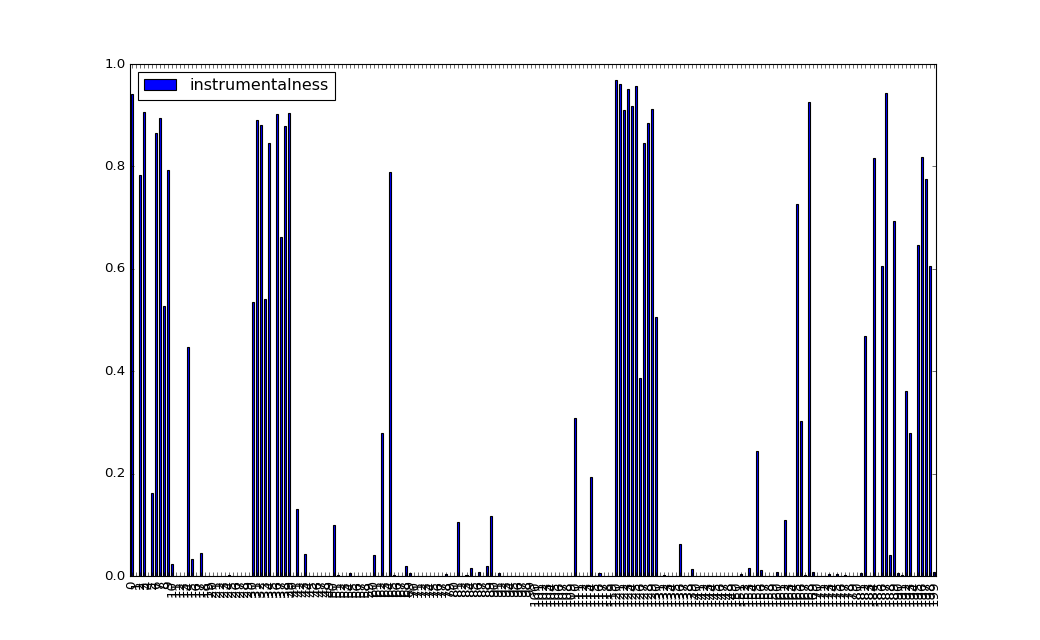

In [13]:
instrumentalness = data[['instrumentalness']]
instrumentalness.plot(kind='bar',figsize=[13,8])

In [14]:
instrumentalness.describe()

,instrumentalness
count,200.000000
mean,0.172061
std,0.318767
min,0.000000
25%,0.000001
50%,0.000615
75%,0.111750
max,0.969000


# Key attribute

<IPython.core.display.Javascript object>


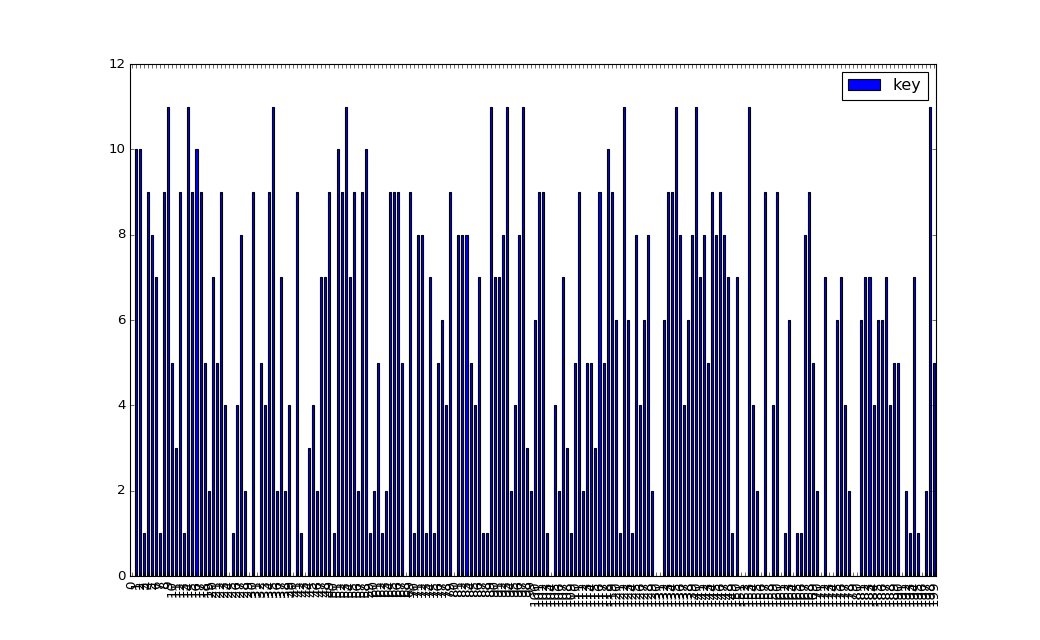

In [15]:
key = data[['key']]
key.plot(kind='bar',figsize=[13,8])

In [16]:
key.describe()

,key
count,200.000000
mean,5.165000
std,3.521331
min,0.000000
25%,2.000000
50%,5.000000
75%,8.000000
max,11.000000


# Liveness attribute

<IPython.core.display.Javascript object>


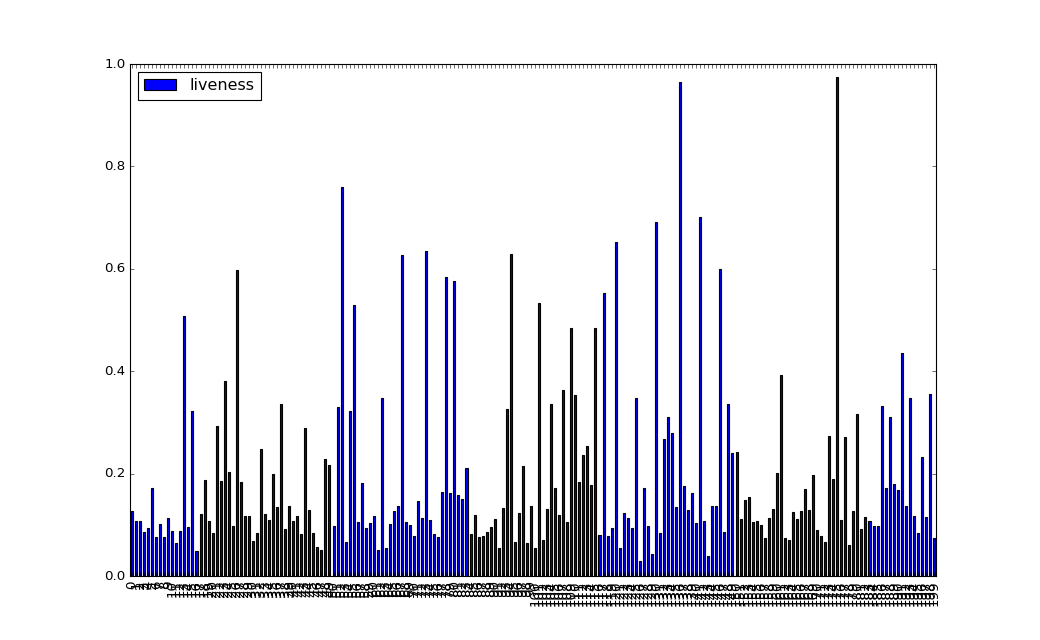

In [17]:
liveness = data[['liveness']]
liveness.plot(kind='bar',figsize=[13,8])

In [18]:
liveness.describe()

,liveness
count,200.000000
mean,0.195631
std,0.170654
min,0.028800
25%,0.093950
50%,0.125500
75%,0.234000
max,0.975000


# Loudness attribute

<IPython.core.display.Javascript object>


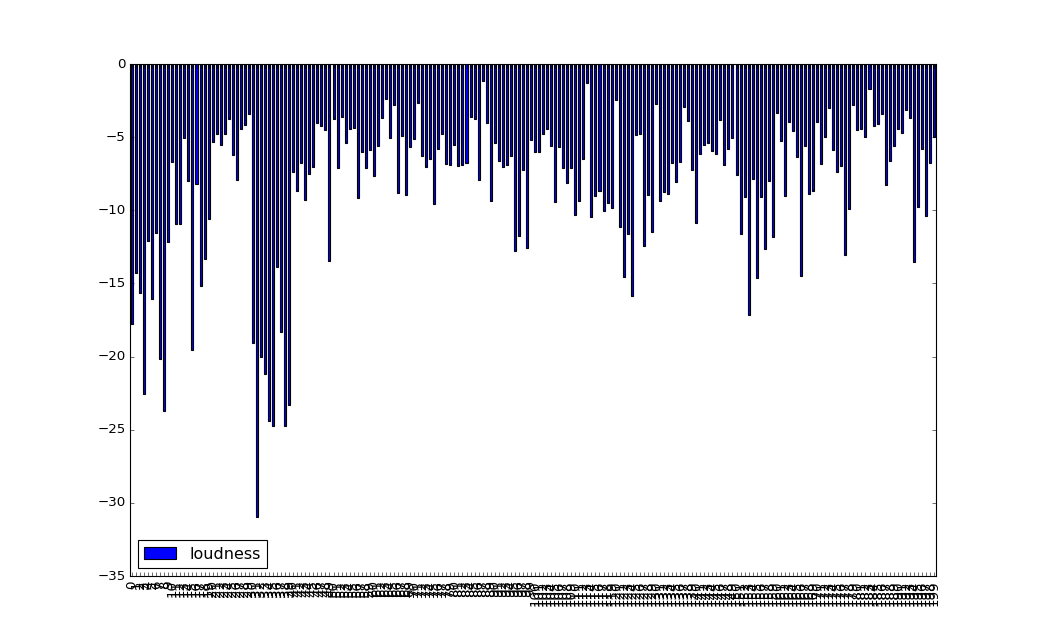

In [19]:
loudness = data[['loudness']]
loudness.plot(kind='bar',figsize=[13,8])

In [20]:
loudness.describe()

,loudness
count,200.000000
mean,-8.322820
std,5.043612
min,-30.937000
25%,-9.848750
50%,-6.918000
75%,-4.967750
max,-1.145000


# Speechiness attribute

<IPython.core.display.Javascript object>


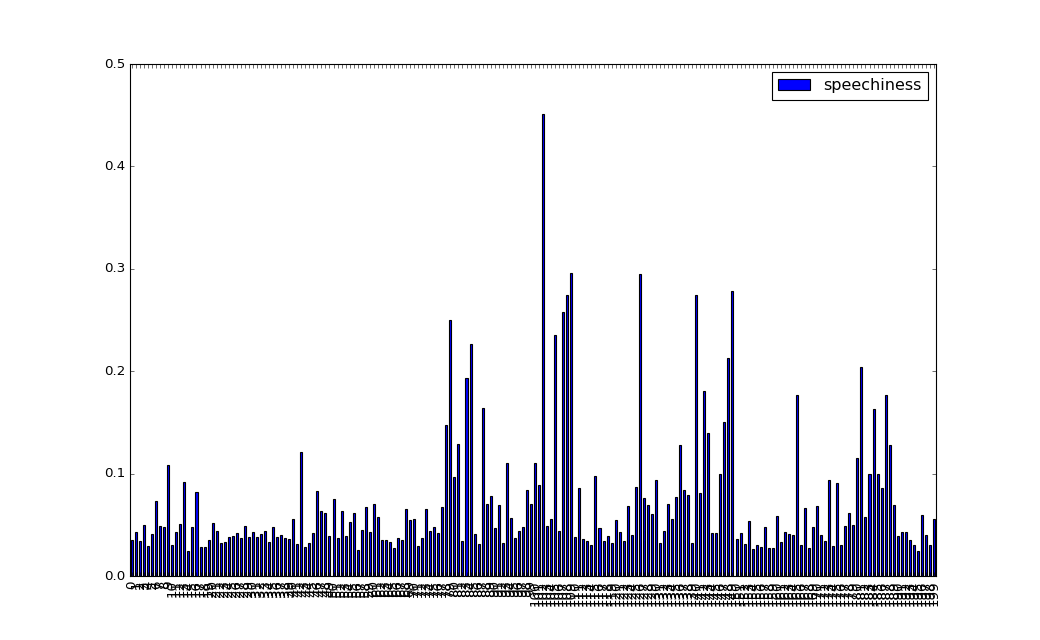

In [21]:
speechiness = data[['speechiness']]
speechiness.plot(kind='bar',figsize=[13,8])

In [22]:
speechiness.describe()

,speechiness
count,200.000000
mean,0.070822
std,0.062198
min,0.024500
25%,0.036725
50%,0.047750
75%,0.076600
max,0.451000


# Tempo attribute

<IPython.core.display.Javascript object>


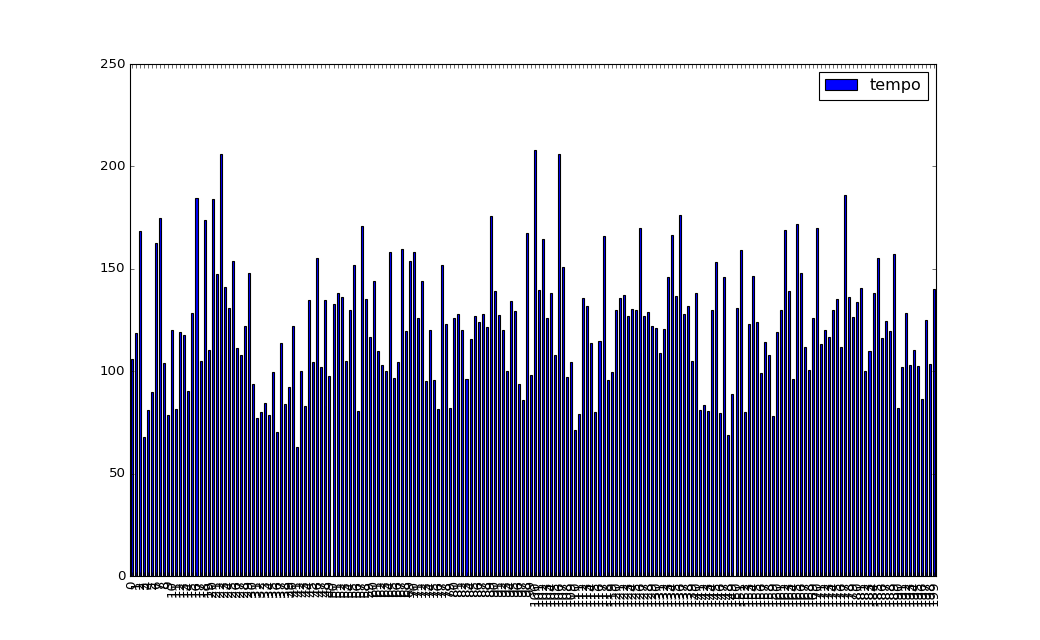

In [23]:
tempo = data[['tempo']]
tempo.plot(kind='bar',figsize=[13,8])

In [24]:
tempo.describe()

,tempo
count,200.000000
mean,122.238440
std,29.130569
min,63.152000
25%,100.296500
50%,121.948500
75%,138.018000
max,207.986000


# Time Signature attribute

<IPython.core.display.Javascript object>


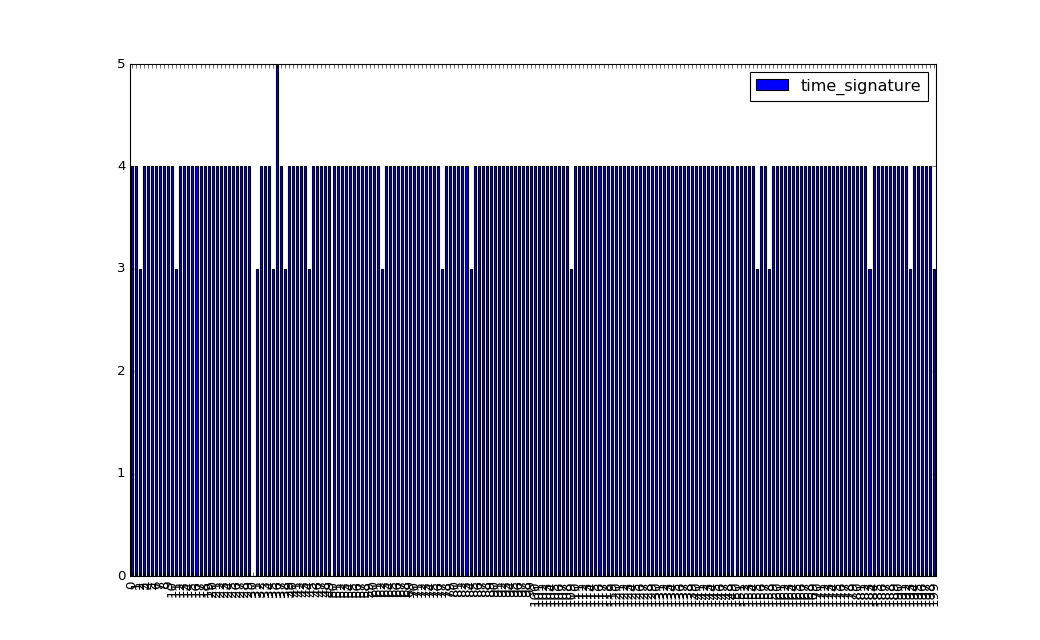

In [25]:
time_signature = data[['time_signature']]
time_signature.plot(kind='bar',figsize=[13,8])

In [26]:
time_signature.describe()

/home/benoit/anaconda3/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,time_signature
count,199.000000
mean,3.929648
std,0.275379
min,3.000000
25%,NaN
50%,NaN
75%,NaN
max,5.000000


# Valence attribute

<IPython.core.display.Javascript object>


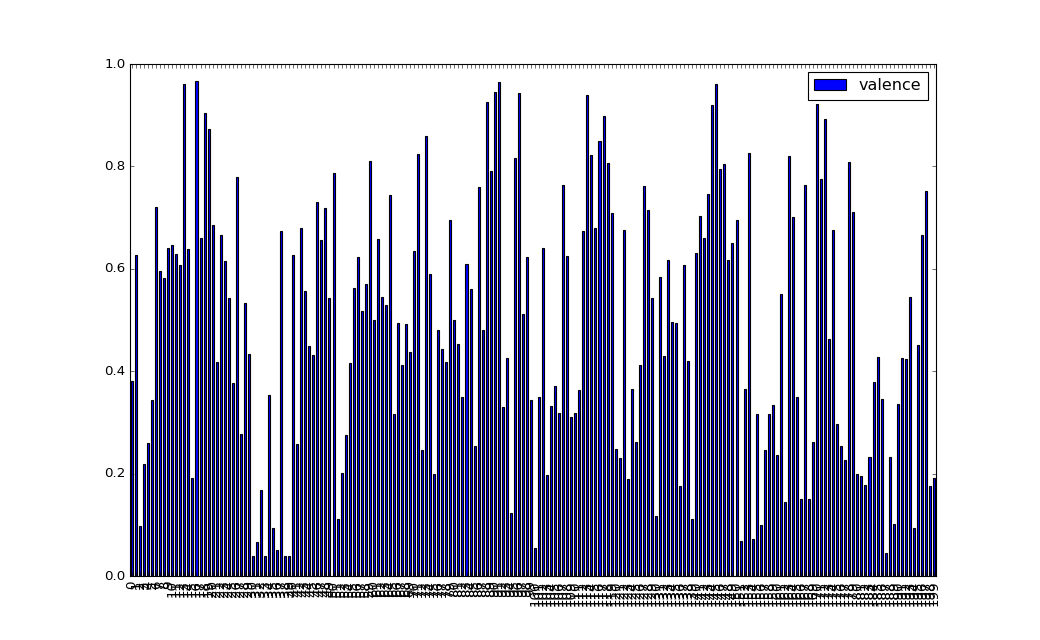

In [27]:
valence = data[['valence']]
valence.plot(kind='bar',figsize=[13,8])

In [28]:
valence.describe()

,valence
count,200.000000
mean,0.490206
std,0.251072
min,0.039200
25%,0.276500
50%,0.495500
75%,0.676000
max,0.967000
